In [1]:
import sys
sys.path.append("./../utils/")
sys.path.append("./../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline
%pwd
%cd ..

/Users/timw/Documents/University/thesis_2


In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp0"

# Data loading
args.from_raw = True
args.file_name = 'smard_data.csv'#"ts_60_sindex_DE_3f.csv"

from_raw_folder = "raw" if args.from_raw else "preproc_non_deepl"
args.path = f"./data/{from_raw_folder}/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "dummy"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [["load", "solar_gen", "wind_gen"], ['load'], ['solar_gen'], ['wind_gen'], ]
args.window_size = 96
args.stride = 24 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon, for 24 it is perfect for dummy
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 48, 96, 192, 336, 720]

# Plotting
args.plot = True
args.plot_date = '2021-07-01'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = True
args.date_time = datetime.now().strftime("%m-%d-%H")

------- Starting to train dummy on ['load', 'solar_gen', 'wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------
------- Starting to train dummy on ['load'] for horizons [24, 48, 96, 192, 336, 720] ----------
------- Starting to train dummy on ['solar_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------
------- Starting to train dummy on ['wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


/Users/timw/Documents/University/thesis_2/scripts/./../utils/visualizations.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,6))


                        mae       mse
target    horizon                    
load      24       0.655878  0.864164
          48       0.655289  0.862964
          96       0.654359  0.860879
          192      0.653018  0.857965
          336      0.651811  0.856286
          720      0.649047  0.851162
          24       0.562697  0.495705
          48       0.561866  0.494212
          96       0.560994  0.492971
          192      0.560000  0.491797
          336      0.558608  0.489709
          720      0.555855  0.486686
solar_gen 24       0.513159  0.766000
          48       0.513169  0.766173
          96       0.513187  0.766430
          192      0.512985  0.766278
          336      0.512510  0.765734
          720      0.511049  0.764084
wind_gen  24       0.891777  1.330787
          48       0.890832  1.328507
          96       0.888896  1.323236
          192      0.886070  1.315819
          336      0.884315  1.313415
          720      0.880236  1.302717


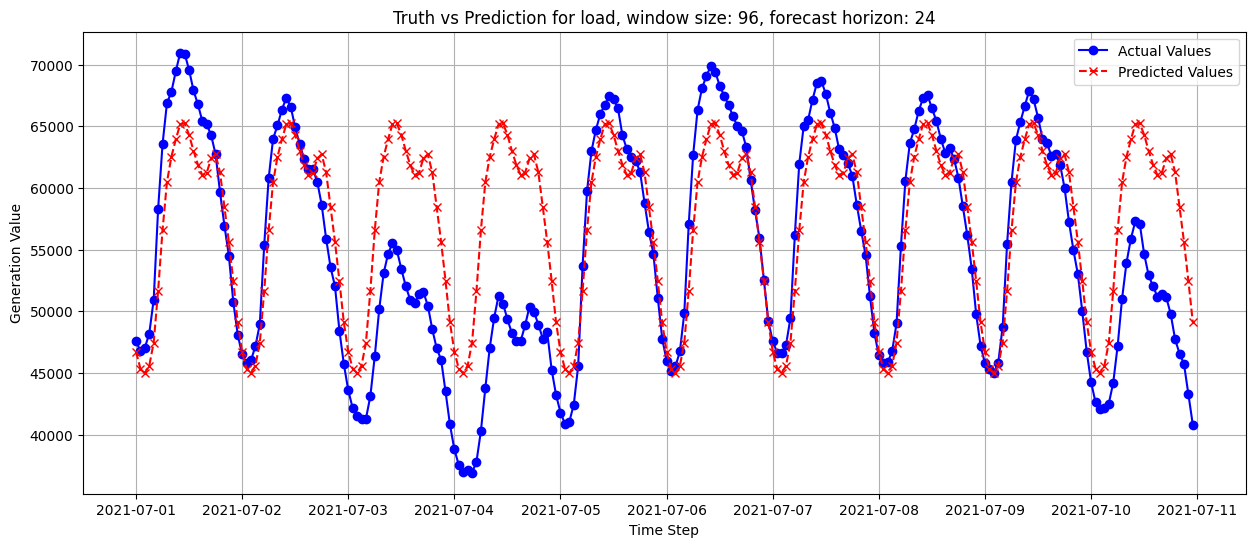

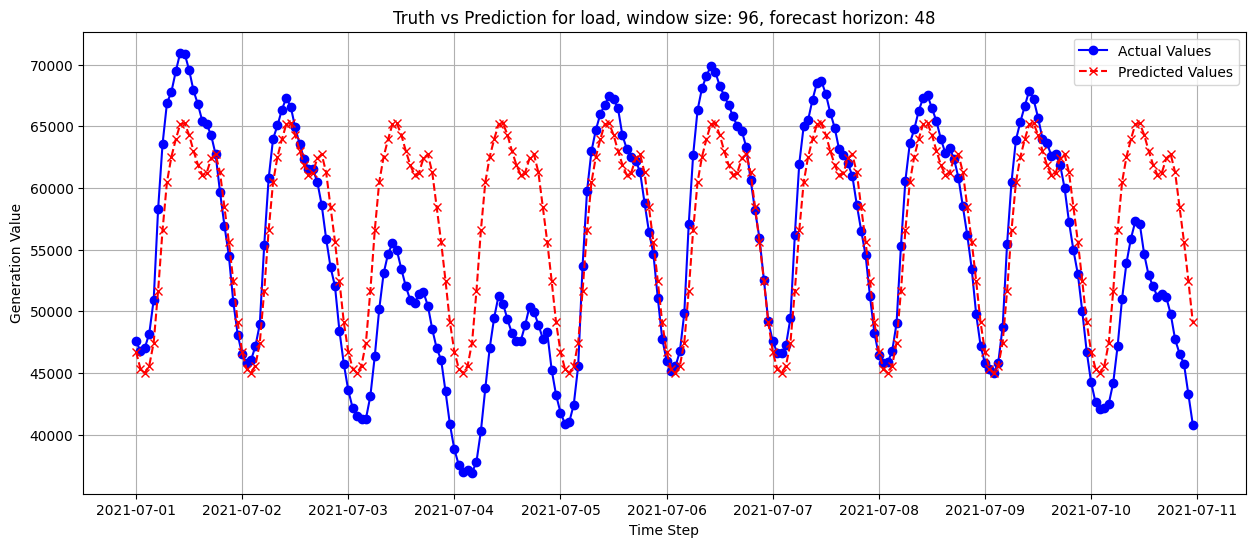

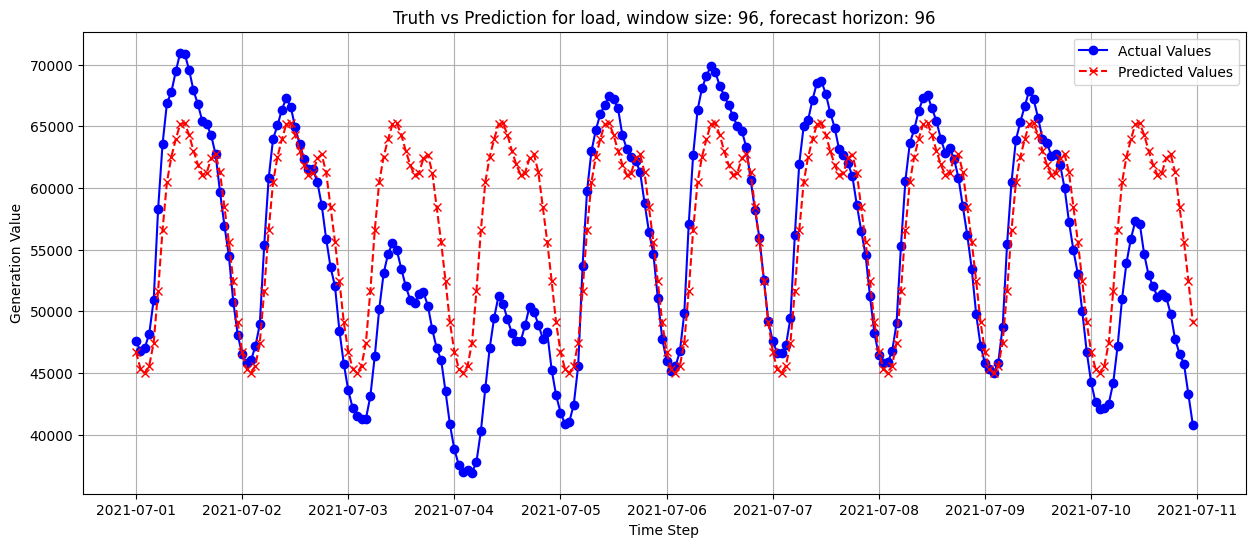

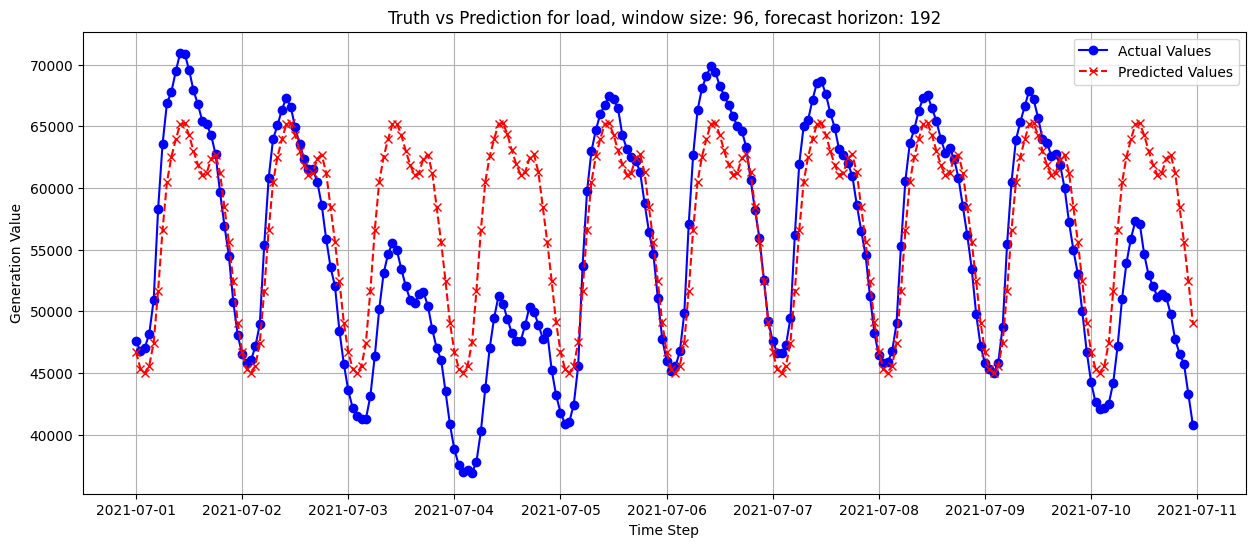

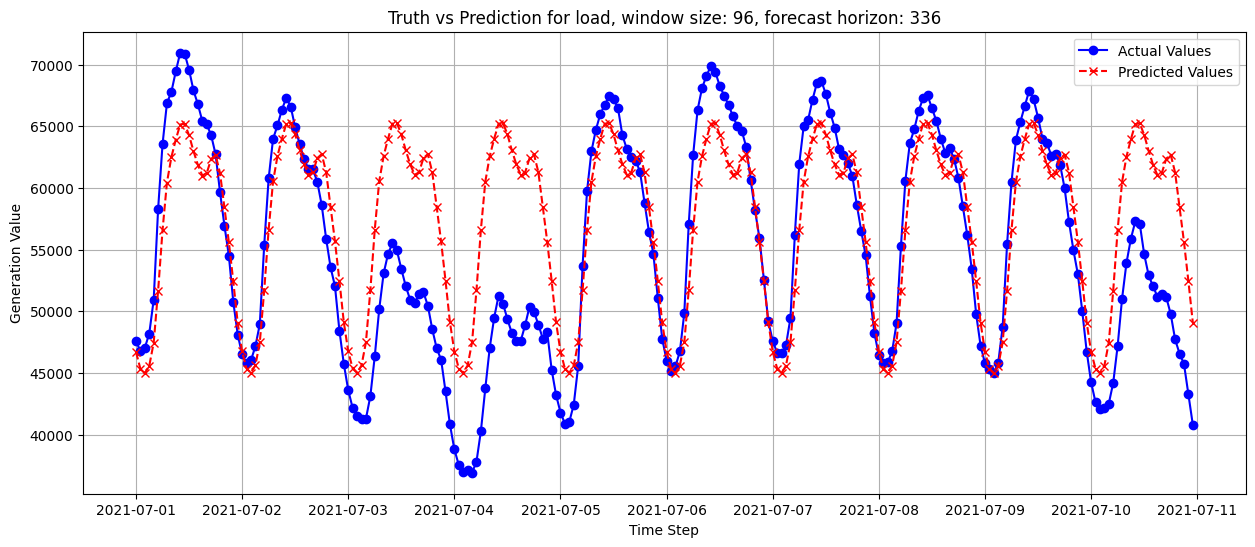

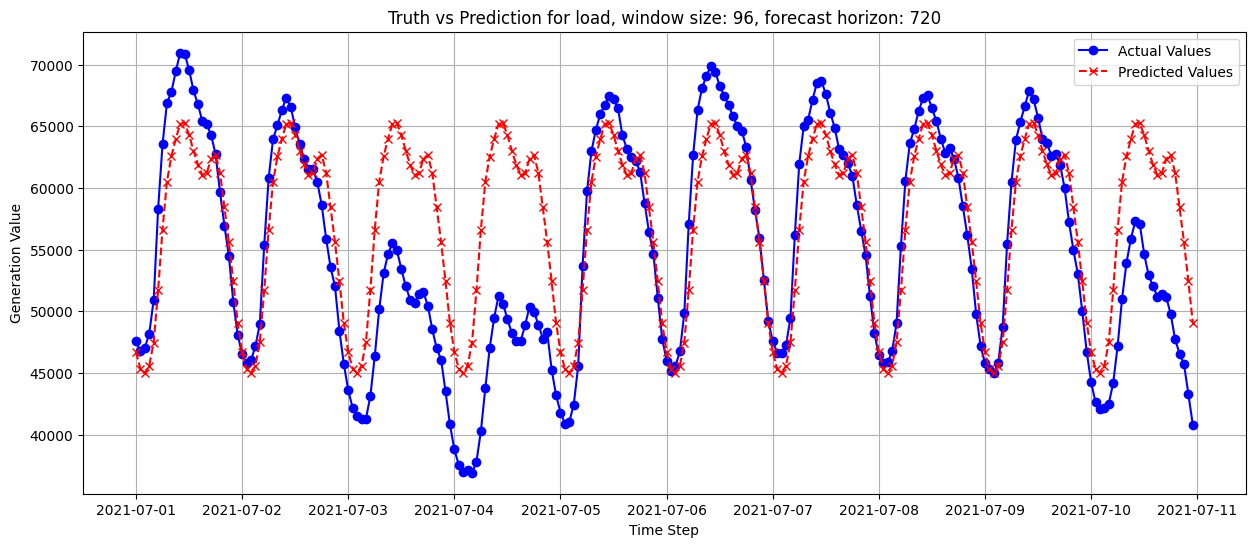

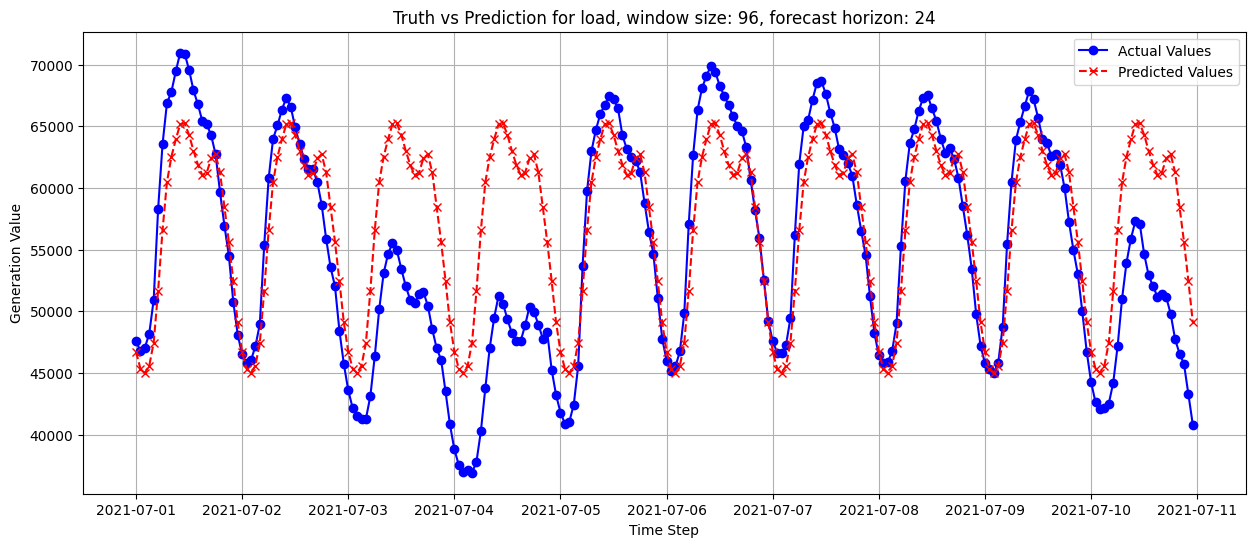

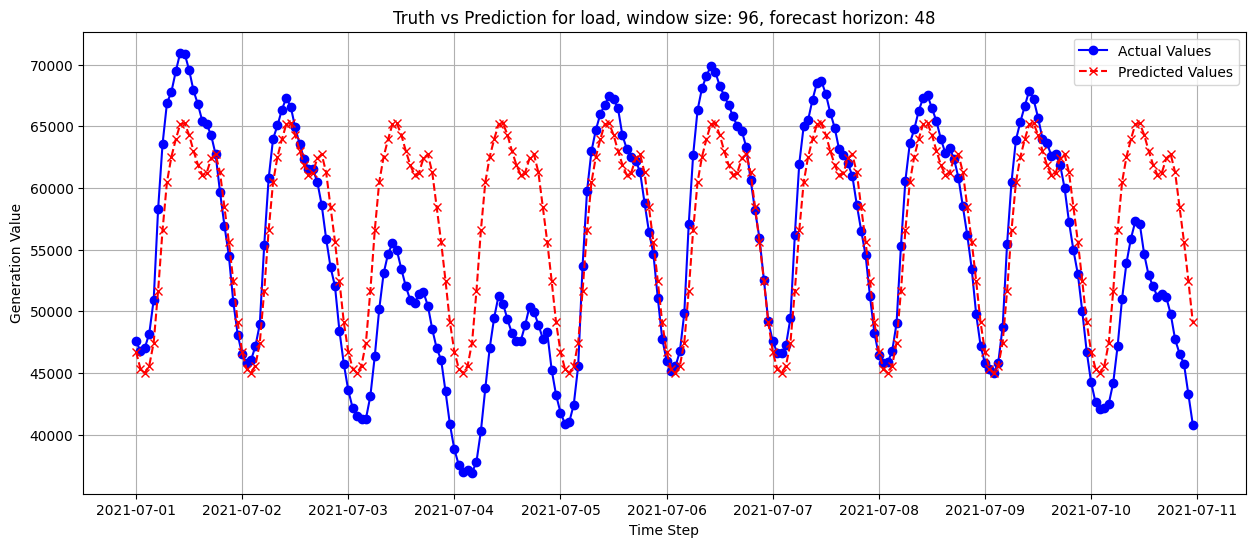

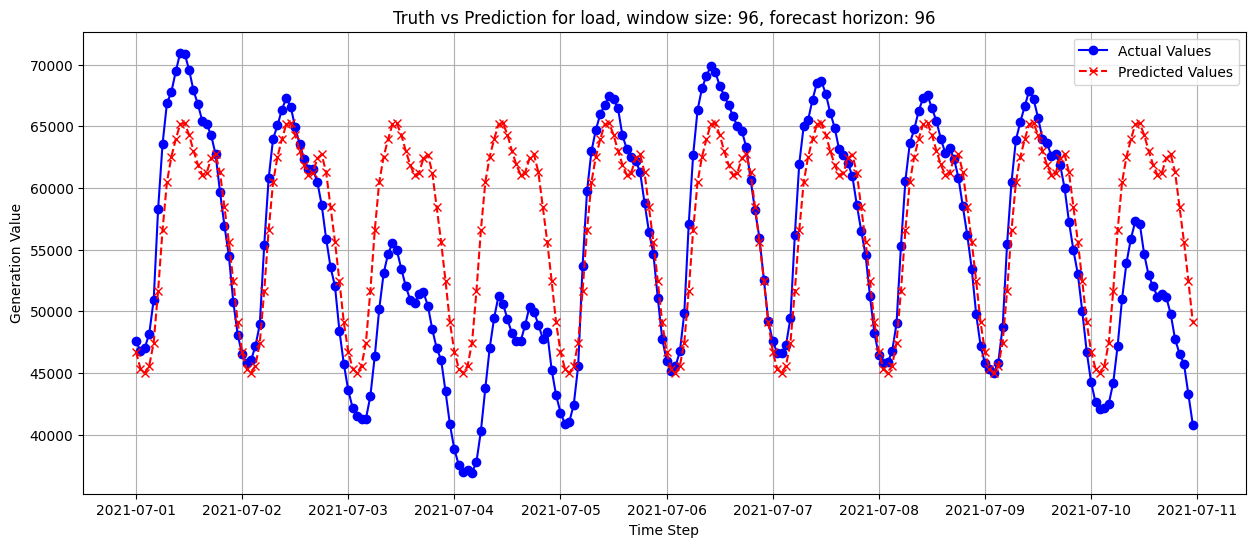

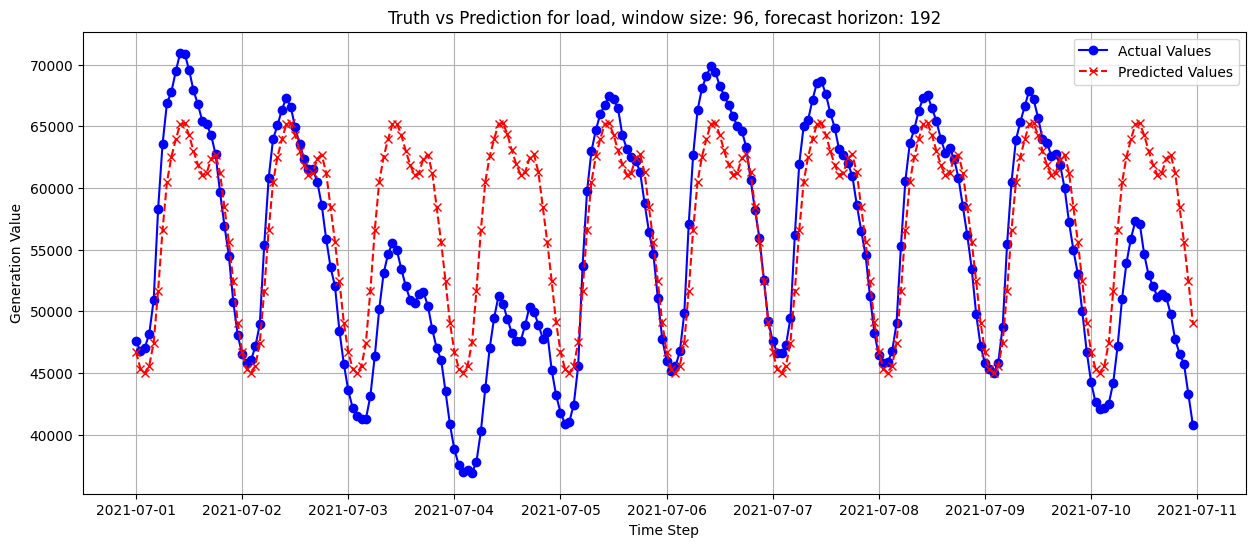

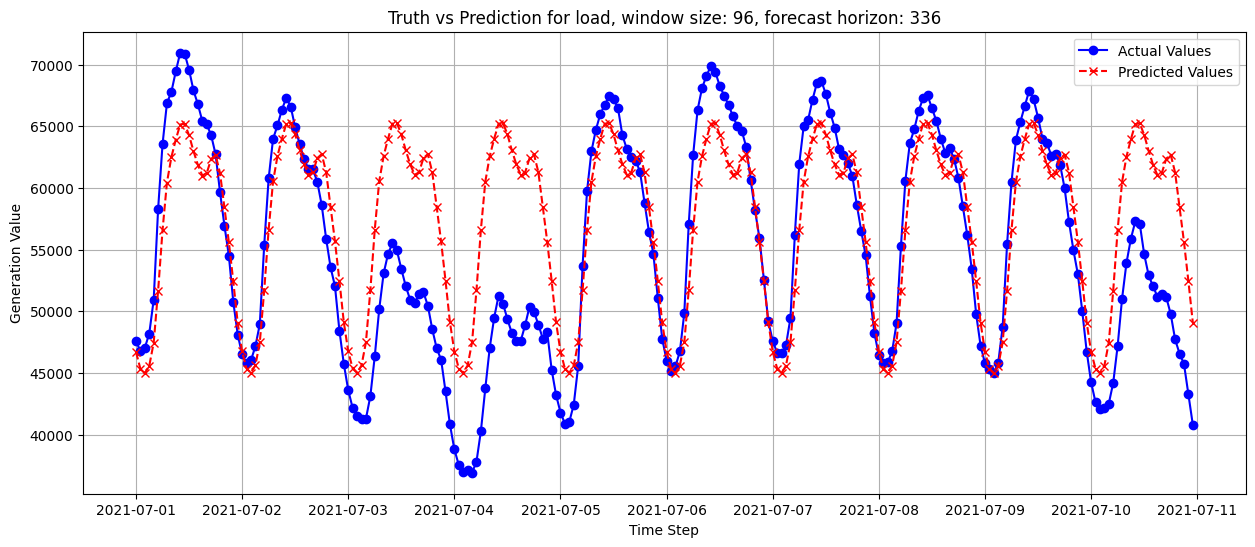

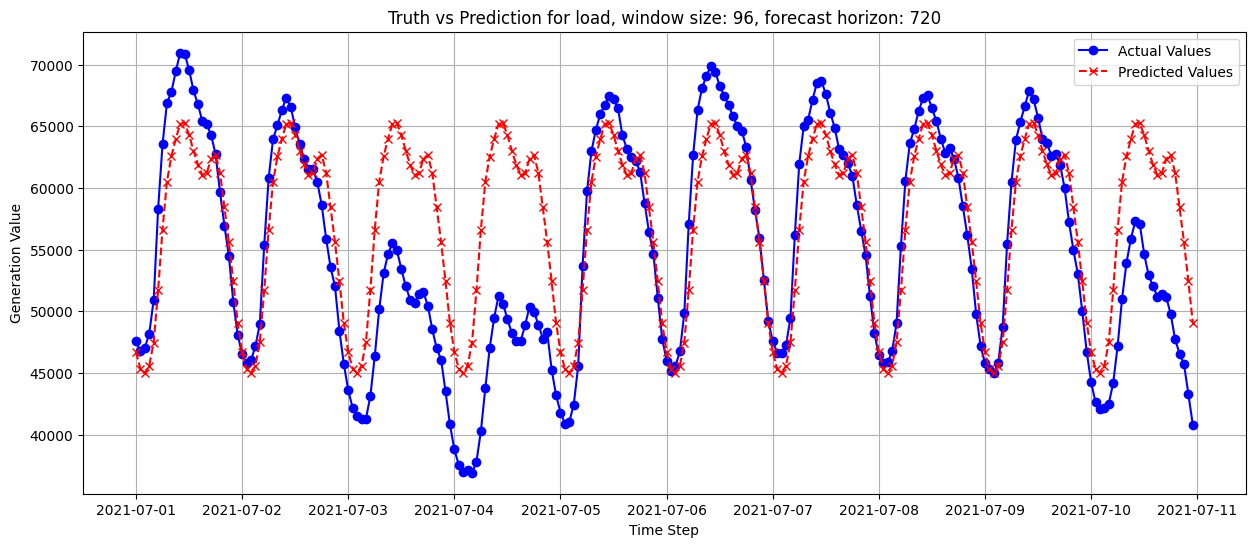

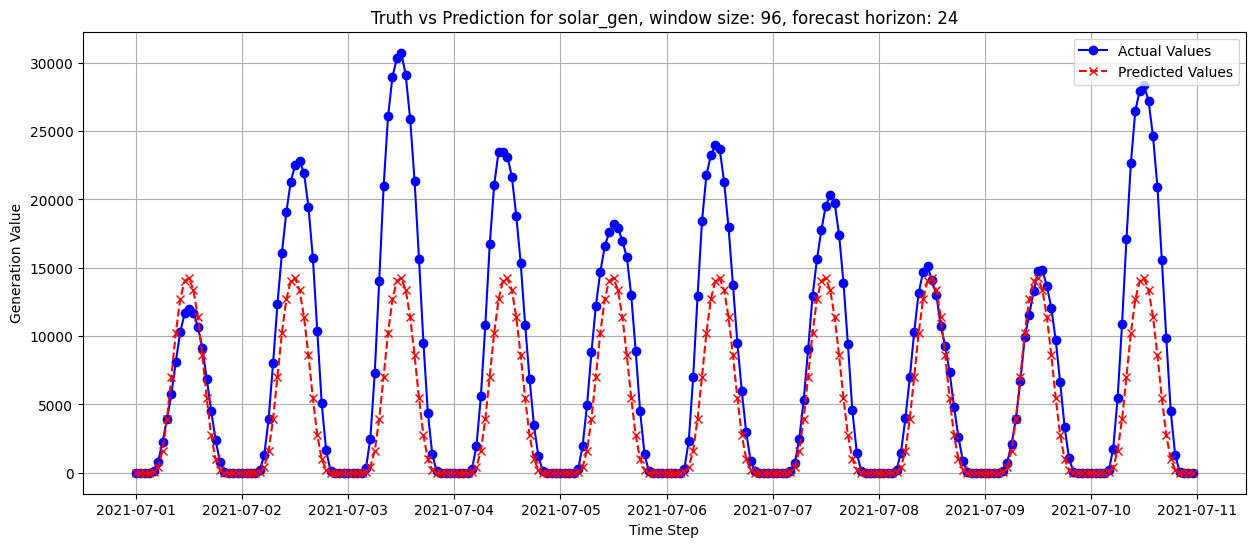

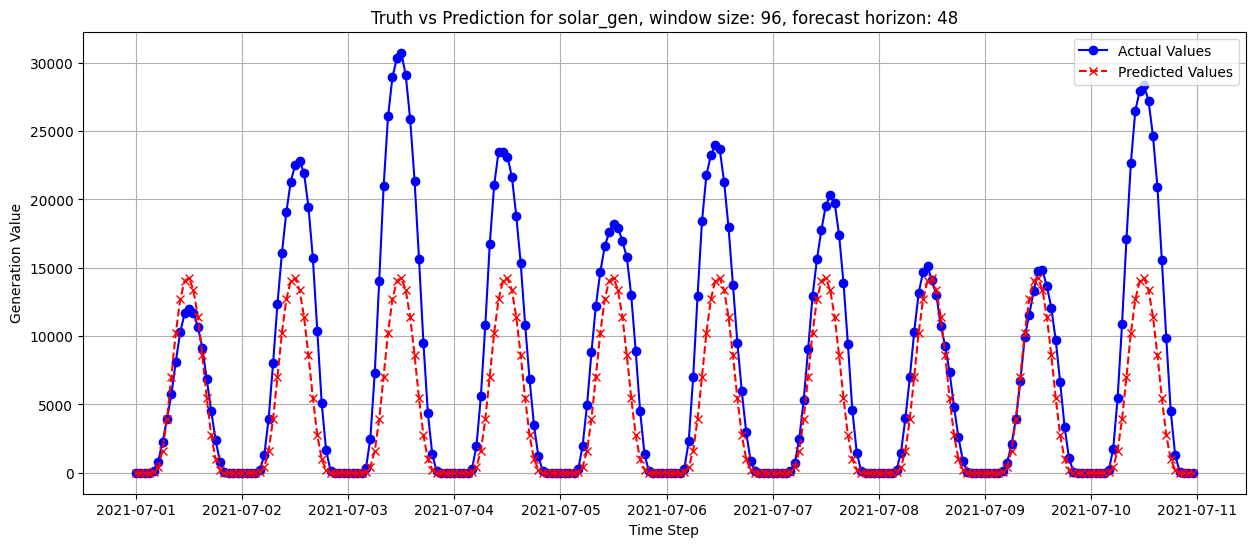

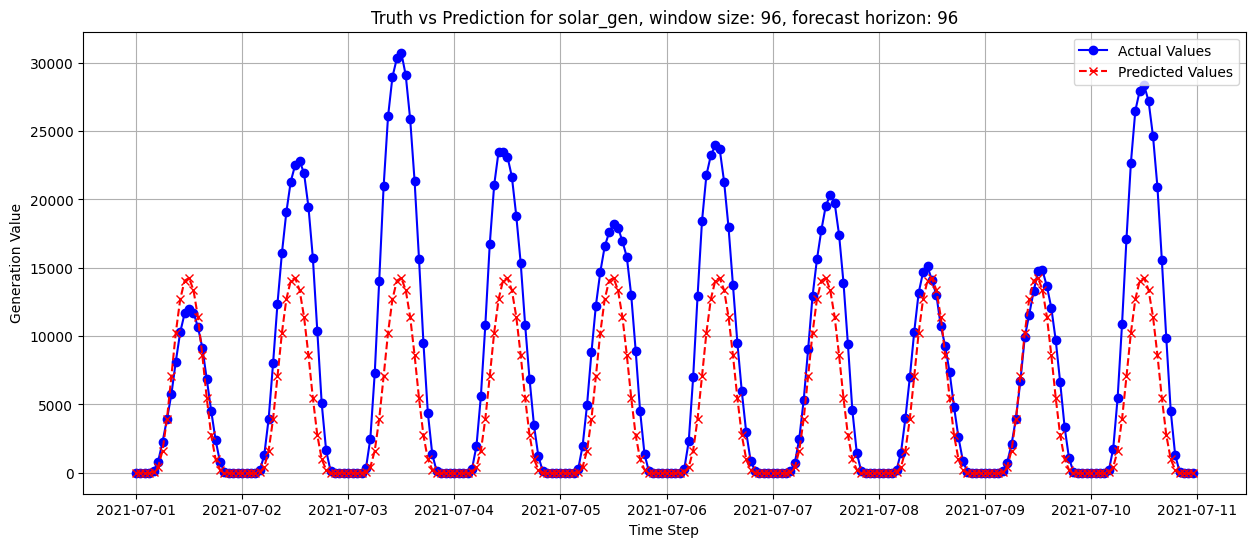

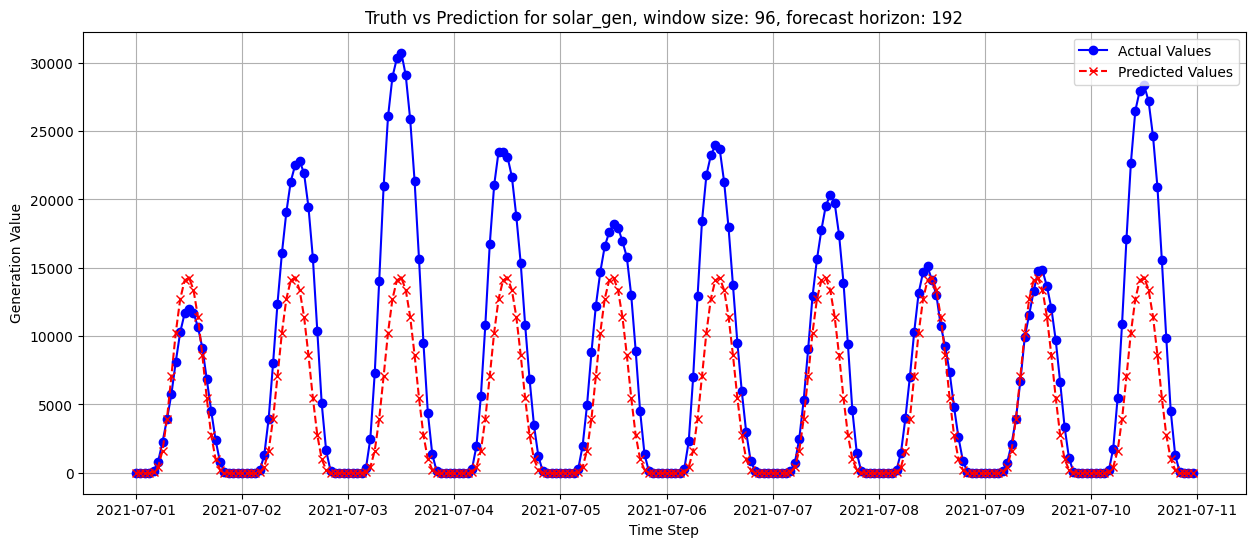

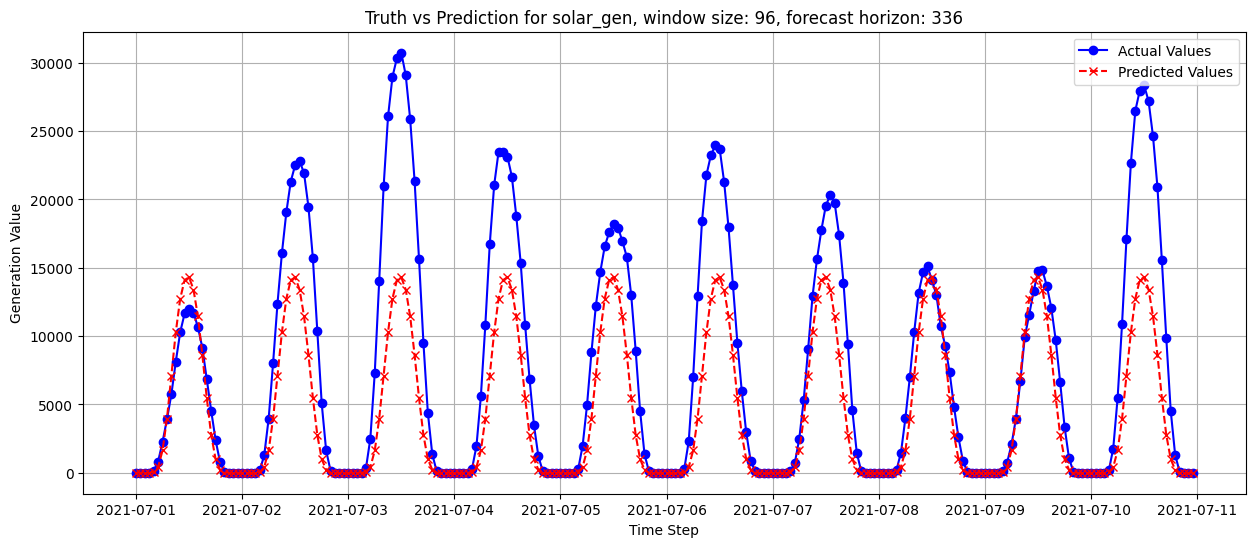

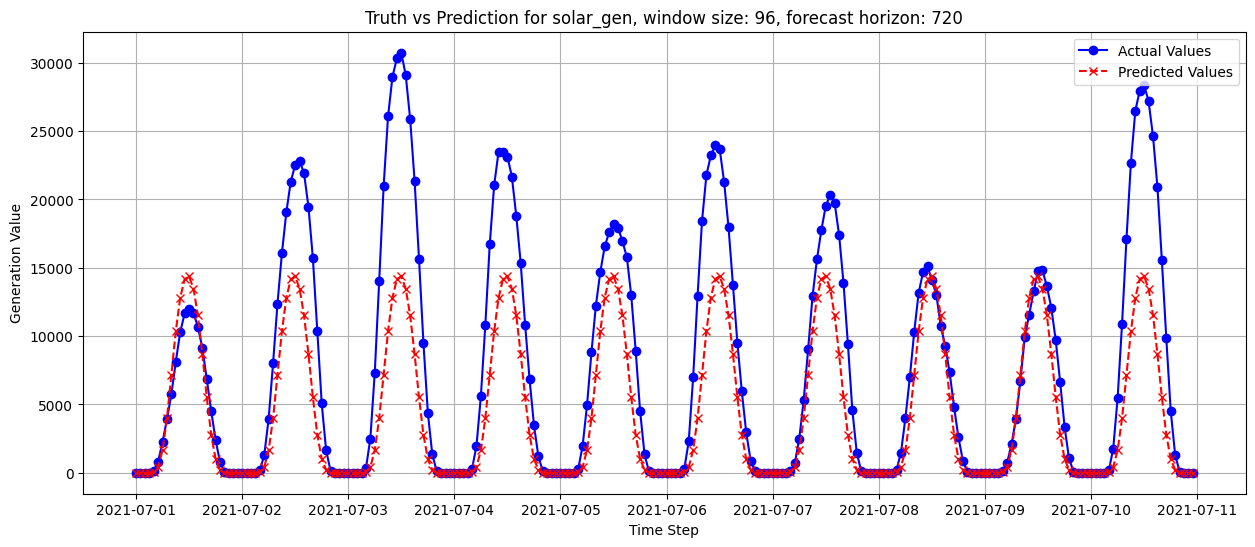

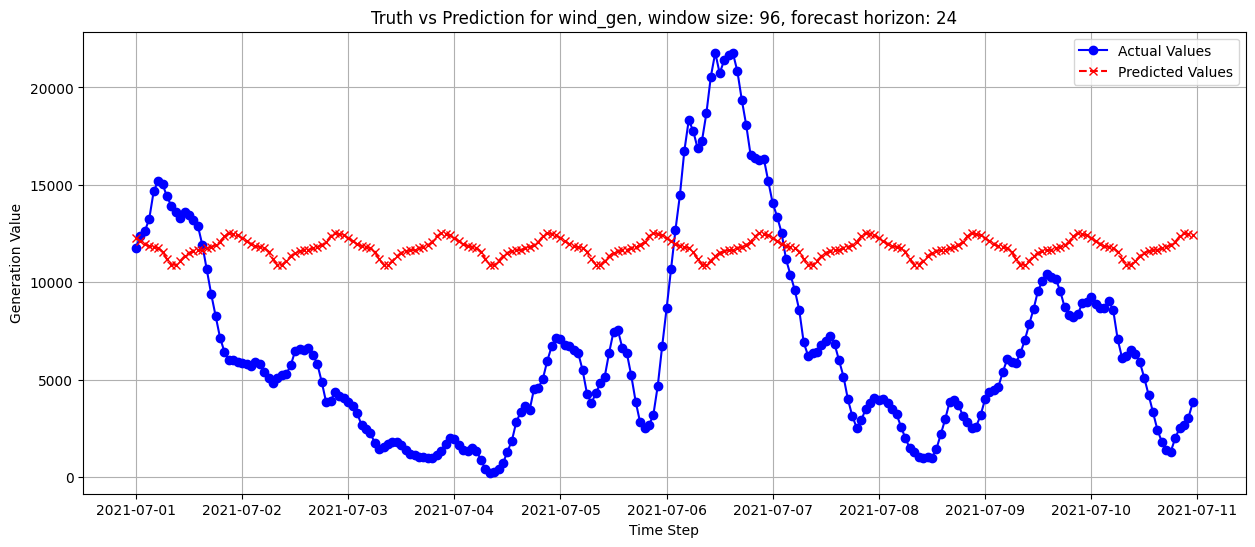

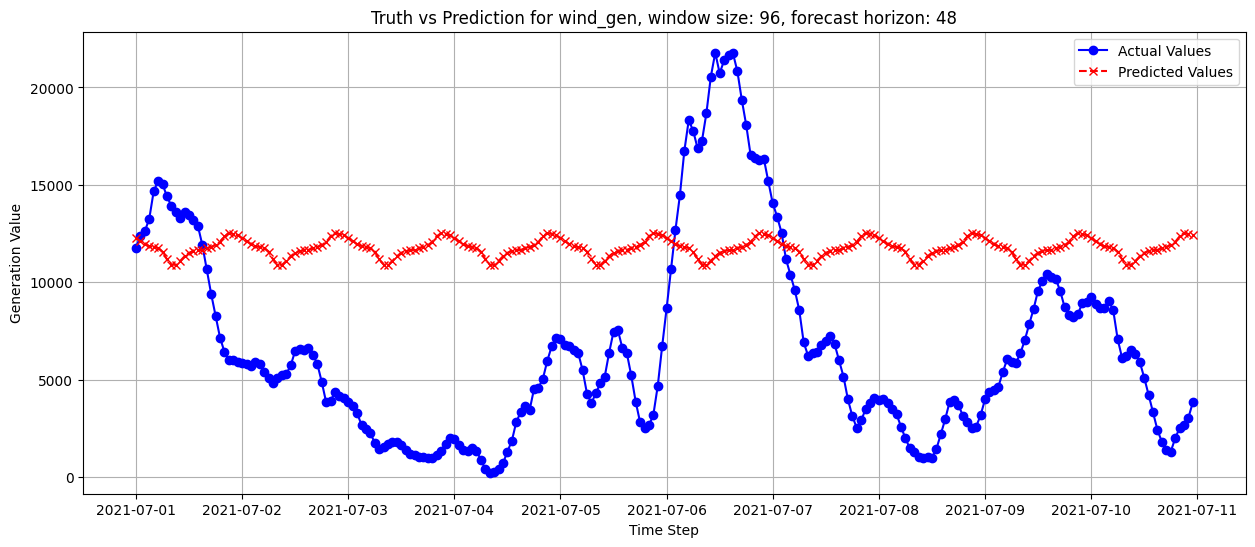

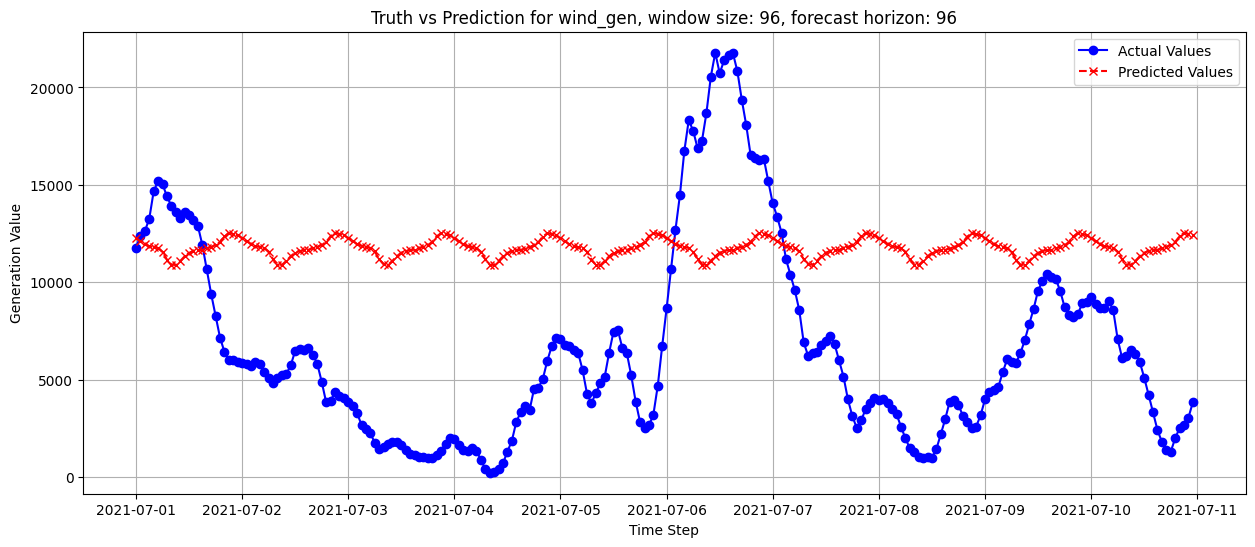

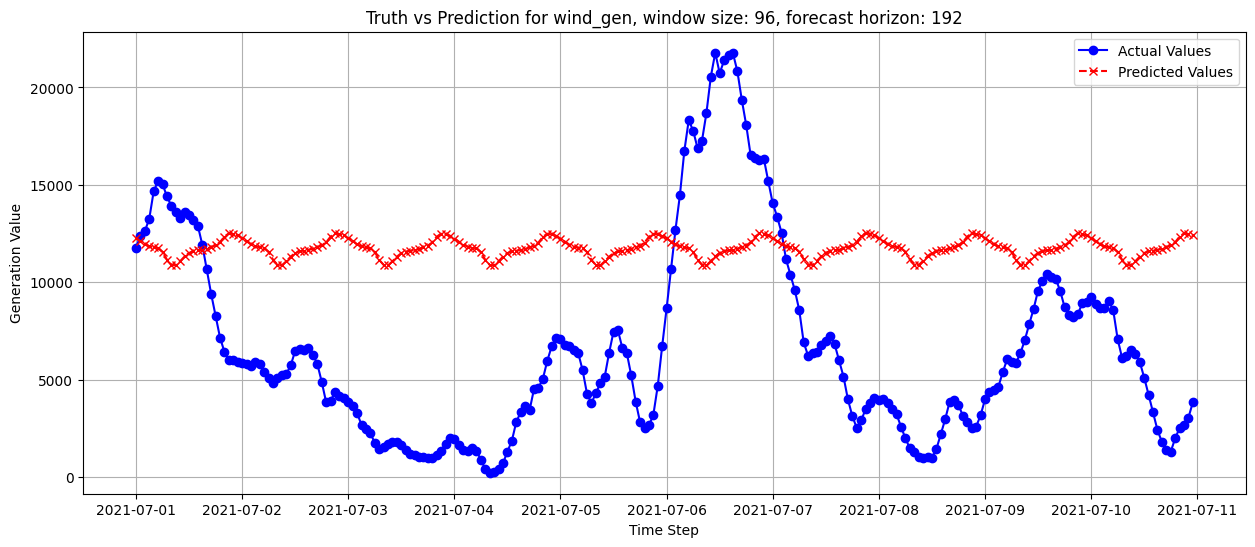

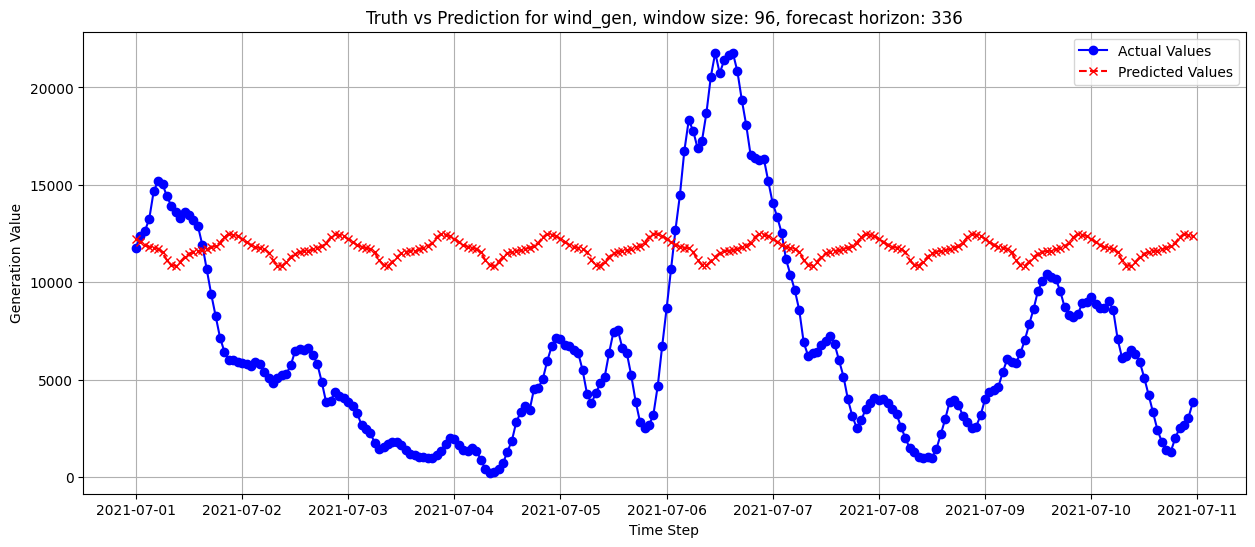

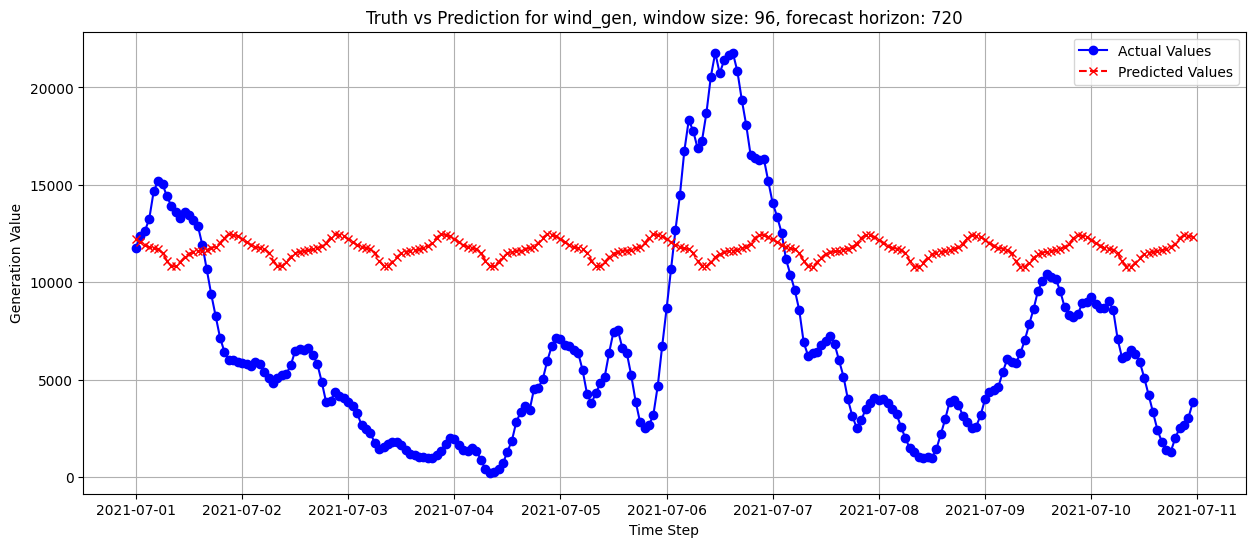

In [3]:
run_non_deepl.pipeline(args)